<a href="https://colab.research.google.com/github/vaidande/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project_By_Ritik_Vaidande.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Importing Libraries

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Loading

In [4]:
#loading dataset
file_path = '/content/gdrive/My Drive/NYC Taxi Trip Time Prediction - Ritik Vaidande/NYC Taxi Data.csv'
df = pd.read_csv(file_path)

In [5]:
#checking dataset shape
df.shape

(1458644, 11)

In [6]:
#first five rows
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
#checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
# Checking for duplicates
df.duplicated().sum()

0

In [9]:
# Checking for null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Our dataset have total **1458644** trip records and **trip_duration** is our target variable. There are no NA values present in the dataset.

In [10]:
#dataset description
df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


# EDA

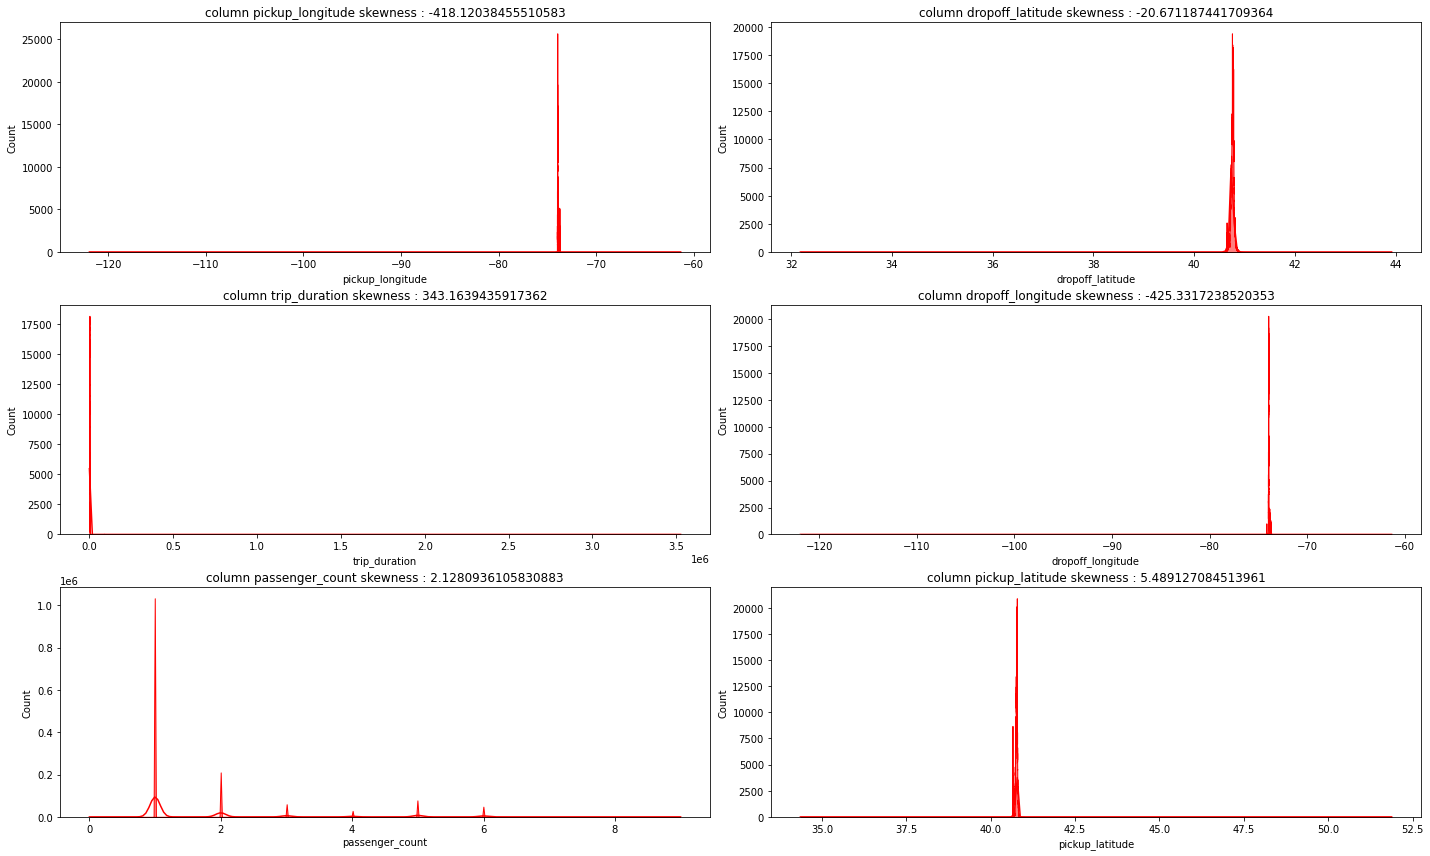

In [ ]:
#feature distribution
column_after_excluding = set(df.columns) - {'vendor_id'}
dist_column_list = df[column_after_excluding].describe().columns.tolist()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,12))
axes = axes.flatten()
for col, ax in zip(dist_column_list, axes):
  sns.histplot(x=col, data=df, color='red', ax=ax, kde=True, element='poly')
  ax.set_title(f'column {col} skewness : {df[col].skew()}')

plt.tight_layout(h_pad=0.5, w_pad=0.8)

From the distribution plots of the numerical features, we can conclude that most of the data is extremely skewed including trip duration.

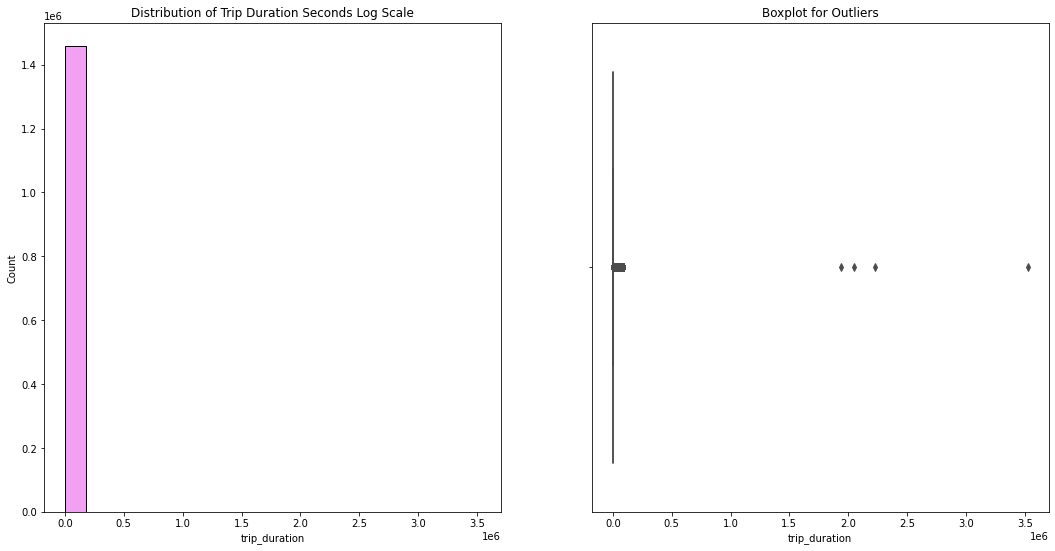

In [ ]:
#plotting trip duration distribution and boxplot for outliers
fig, axes = plt.subplots(ncols=2, figsize=(18,9))
axes = axes.flatten()
sns.histplot(df['trip_duration'], color='violet', ax=axes[0], kde=False, bins=20)
axes[0].set_title('Distribution of Trip Duration Seconds Log Scale')
sns.boxplot(df['trip_duration'], color='yellow', ax=axes[1])
axes[1].set_title('Boxplot for Outliers')
plt.show()

In [ ]:
#lets see percentile from 0 to 100
for i in range(0,100,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


In [ ]:
#lets see percentile from 90 to 100 
for i in range(90,100):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


In [ ]:
#lets see percentile from 0 to 10 
for i in range(0,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
1 percentile value is 87
2 percentile value is 122
3 percentile value is 146
4 percentile value is 165
5 percentile value is 180
6 percentile value is 195
7 percentile value is 209
8 percentile value is 221
9 percentile value is 233
100 percentile value is  3526282


In [ ]:
# Setting Trip duration upper limit
df = df[df.trip_duration <= 3400]

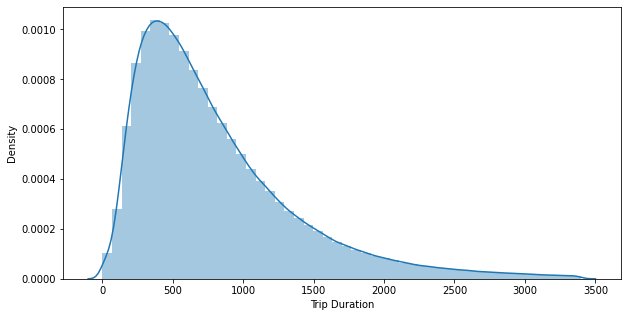

In [ ]:
#distribution plot for trip duration after setting upper limit
plt.figure(figsize = (10,5))
sns.distplot(df['trip_duration'])
plt.xlabel('Trip Duration')
plt.show()

99th percentile of trip duration is completed under 3440 seconds i.e. approx. 1 hour.

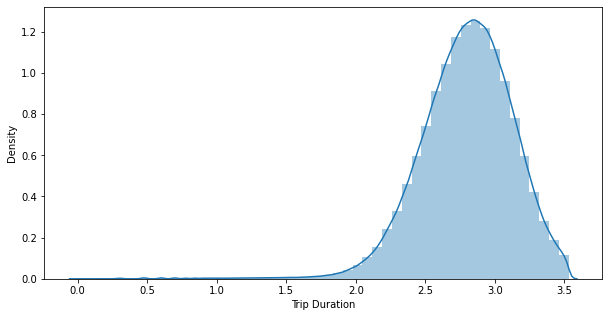

In [ ]:
#distribution plot for trip duration applying log of trip_duration
plt.figure(figsize = (10,5))
sns.distplot(np.log10(df['trip_duration']))
plt.xlabel('Trip Duration')
plt.show()

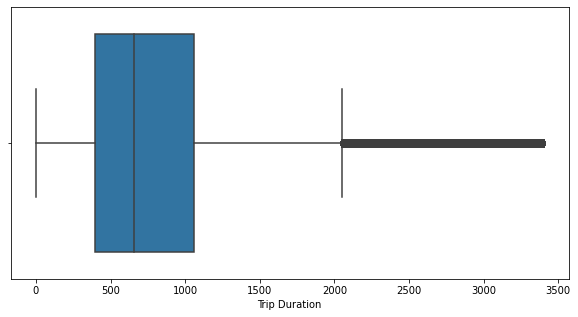

In [ ]:
#Boxplot for trip duration 
plt.figure(figsize = (10,5))
sns.boxplot(df.trip_duration)
plt.xlabel('Trip Duration')
plt.show()

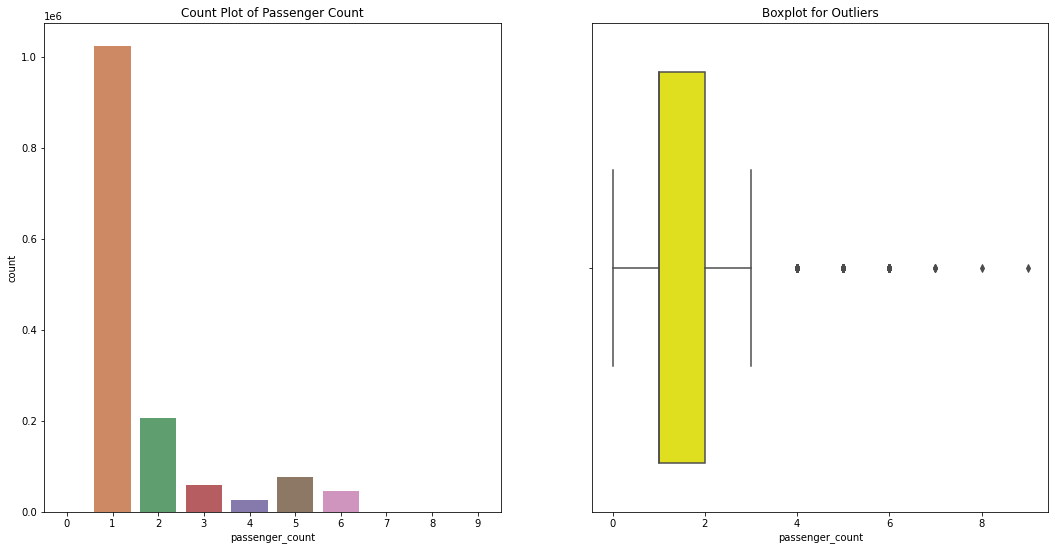

In [ ]:
#plotting passenger count and boxplot for outliers
fig, axes = plt.subplots(ncols=2, figsize=(18,9))
axes = axes.flatten()
sns.countplot(df['passenger_count'], palette = 'deep', ax=axes[0])
axes[0].set_title('Count Plot of Passenger Count')
sns.boxplot(df['passenger_count'], color='yellow', ax=axes[1])
axes[1].set_title('Boxplot for Outliers')
plt.show()

Single passenger trips holds the highest amount of Taxi trips. New Yorker’s rarely travel in groups.

In [ ]:
#explore the passenger count and their numbers of trips 
no_of_passenger = df['passenger_count'].value_counts().reset_index()
no_of_passenger.rename(columns={'index':'no_of_passenger', 'passenger_count':'trip_counts'})

,no_of_passenger,trip_counts
0,1,1023736
1,2,207556
2,5,77174
3,3,59183
4,6,47755
5,4,27989
6,0,59
7,7,3
8,9,1
9,8,1


**Rows having 0, 7, 8, 9 passengers are outliers.**

In [ ]:
#Removing 0 and more than 6 passenger 
df = df[df['passenger_count'] != 0]
df = df[df['passenger_count']<=6]

In [ ]:
#extracting day, month, date, hour, mins, weekday from datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday

df['dropoff_min'] = df['dropoff_datetime'].dt.minute

Text(0.5, 1.0, 'Monthly Trips')

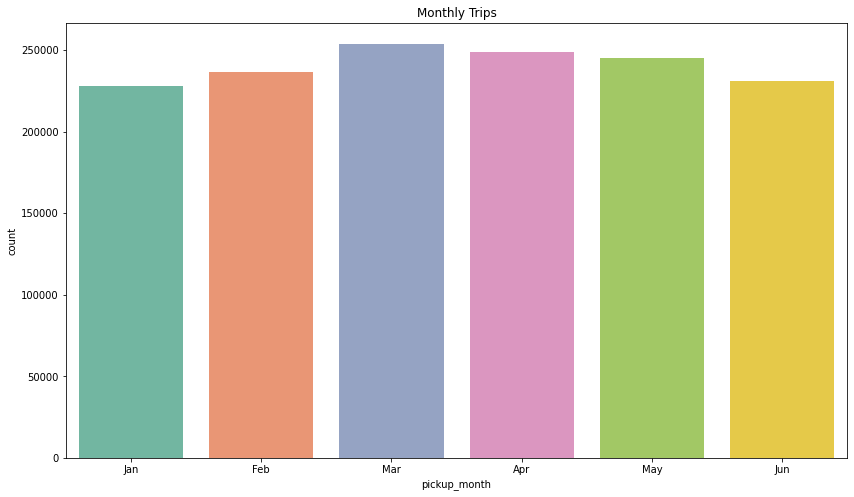

In [ ]:
#plotting monthly trips
plt.figure(figsize=(14,8))
sns.countplot(df['pickup_month'], palette='Set2')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb','Mar','Apr','May','Jun'])
plt.title('Monthly Trips')

Month March crosses the 25k mark with the most number of trips in first-half of the year.

Text(0.5, 1.0, 'Pickup Hour')

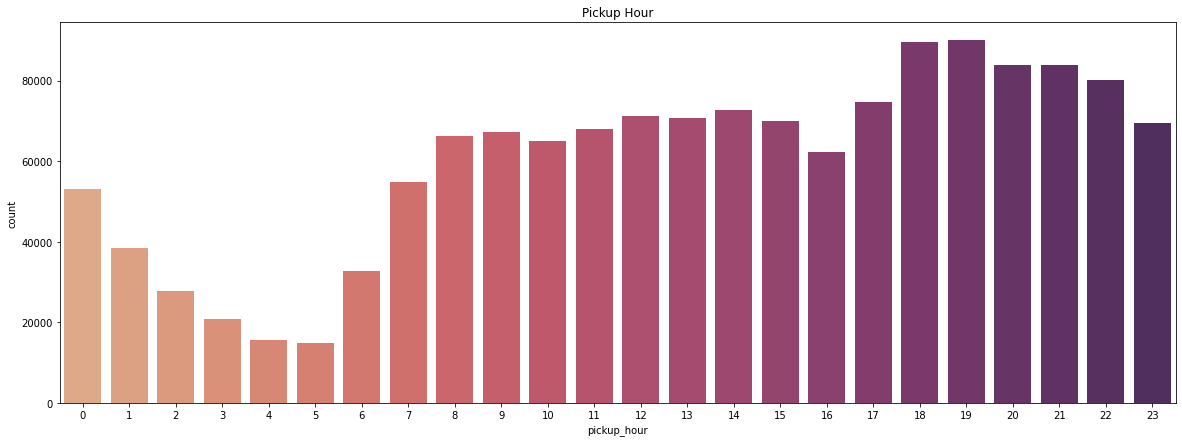

In [ ]:
#plotting pickup hour
plt.figure(figsize=(20,7))
sns.countplot(df['pickup_hour'], palette='flare')
plt.title('Pickup Hour')

People prefer taking an taxi more after daylight.

Text(0.5, 1.0, 'Weekday Trips')

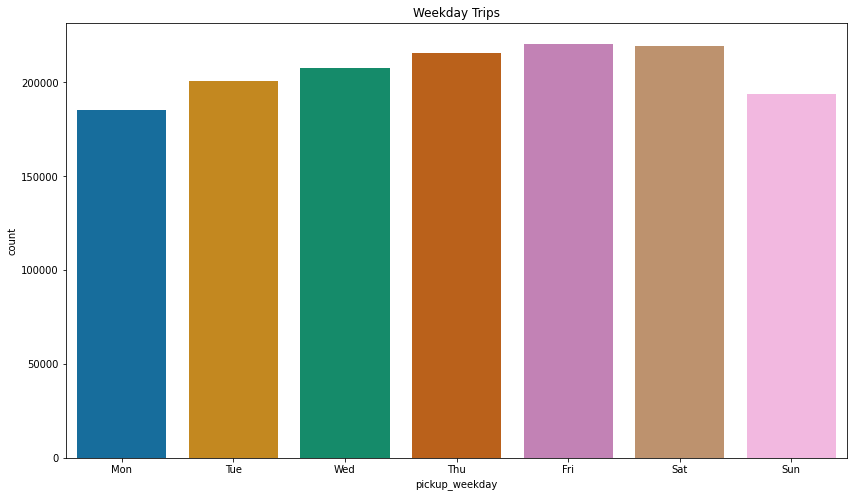

In [ ]:
#plotting weekday trips
plt.figure(figsize=(14,8))
sns.countplot(df['pickup_weekday'], palette='colorblind')
plt.xticks([0,1,2,3,4,5,6], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Weekday Trips')

New Yorker’s prefer going out on Friday and Saturday.

Text(0.5, 1.0, 'Daily Trips')

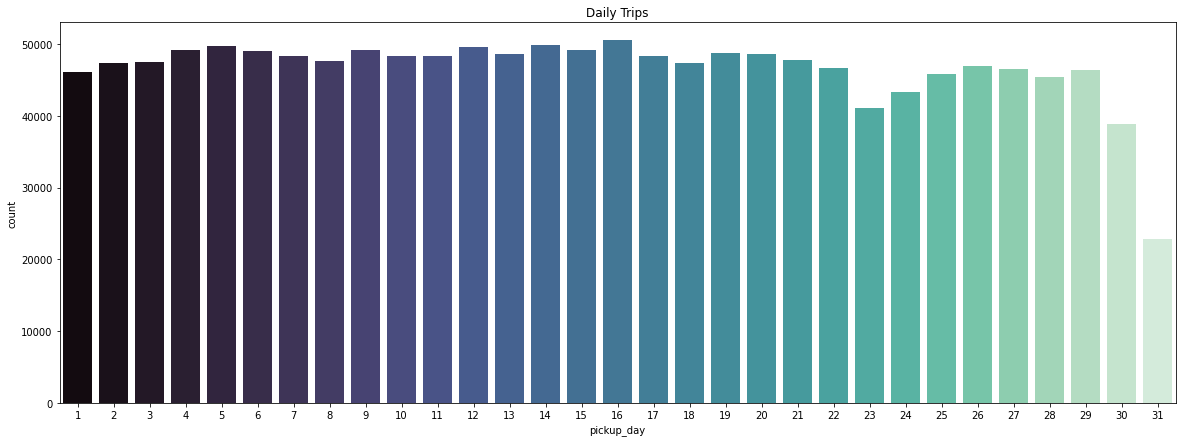

In [ ]:
#plotting daily trips
plt.figure(figsize=(20,7))
sns.countplot(df['pickup_day'], palette='mako')
plt.title('Daily Trips')

Seems like New Yorker’s do not prefer to get a Taxi on Month-Ends.

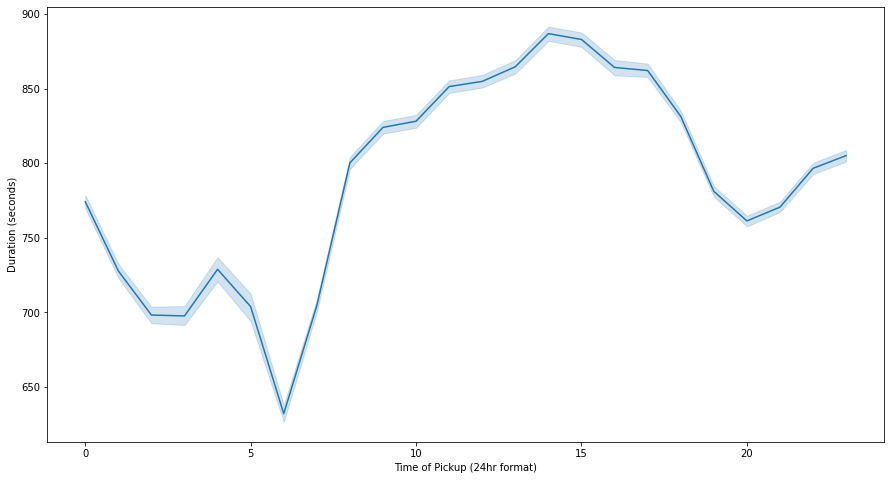

In [ ]:
#plotting line chart of Trip Duration per hour
plt.figure(figsize = (15,8))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

Around 3pm trip duration is high, NYC’s heavy traffic could be the reason.

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,2016-03-14,17,24,0,32
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,2016-06-12,0,43,6,54
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,2016-01-19,11,35,1,10
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,4,2016-04-06,19,32,2,39
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,3,2016-03-26,13,30,5,38


In [ ]:
#dropping unnecessary columns
nyctaxidf = df.drop(['pickup_datetime','dropoff_datetime','pickup_date','id'], axis=1)
nyctaxidf.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,17,24,0,32
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,0,43,6,54
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,1,11,35,1,10
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,4,19,32,2,39
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,3,13,30,5,38


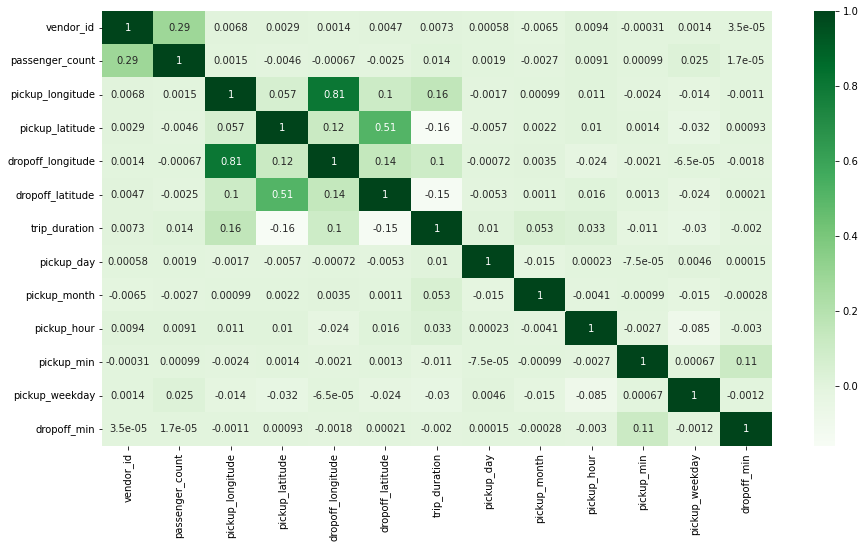

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='Greens')